In [18]:
import numpy as np # array handling
import pandas as pd # dataset
import seaborn as sns # viz
import matplotlib.pyplot as plt #viz
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')


#------------------
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
df = pd.read_csv('/content/drive/MyDrive/Fake review detection/fake reviews dataset.csv')
df.head(10) # this read first 5 row

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/fake reviews dataset.csv'

In [ ]:
# @title rating

from matplotlib import pyplot as plt
df['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name 'df' is not defined

In [ ]:
df.isnull().sum() # we check any column for null value

category    0
rating      0
label       0
text_       0
dtype: int64

In [ ]:
df.info()

# object -> string
# int -> ?
# float -> ?

NameError: name 'df' is not defined

In [ ]:
df.describe() # only numeric column will taken care

NameError: name 'df' is not defined

In [ ]:
df['rating'].value_counts() # this function shows the value frequency of each entry

NameError: name 'df' is not defined

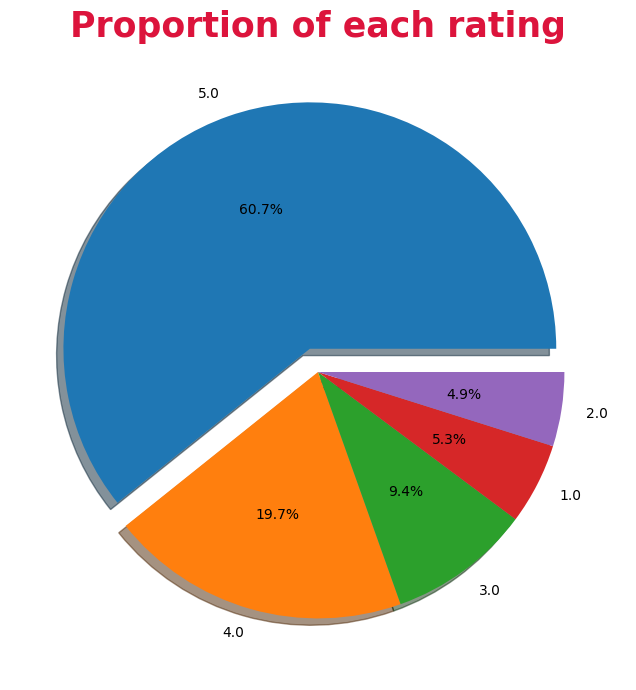

In [ ]:
plt.figure(figsize=(15,8))
labels = df['rating'].value_counts().keys()
values = df['rating'].value_counts().values
explode = (0.1,0,0,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Proportion of each rating',fontweight='bold',fontsize=25,pad=20,color='crimson')
plt.show()

In [ ]:
def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
df['text_'][0], clean_text(df['text_'][0]) # applying clean_text function over the review 1  which is on index 0

('Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty',
 'Love Well made sturdy comfortable love itVery pretty')

In [ ]:
df['text_'].head().apply(clean_text)

0    Love Well made sturdy comfortable love itVery ...
1    love great upgrade original Ive mine couple years
2              pillow saved back love look feel pillow
3          Missing information use great product price
4                 nice set Good quality set two months
Name: text_, dtype: object

In [ ]:
df.shape

(40432, 4)

In [ ]:
df['text_'] = df['text_'].apply(clean_text)# applying clean_text function over entire column

In [ ]:
df['text_'] = df['text_'].astype(str) # you can change the type of column to string

In [ ]:
df['text_'].head(20)

0     Love Well made sturdy comfortable love itVery ...
1     love great upgrade original Ive mine couple years
2               pillow saved back love look feel pillow
3           Missing information use great product price
4                  nice set Good quality set two months
5                              WANTED DIFFERENT FLAVORS
6                 perfect touch thing wish little space
7     done fit well look great love smoothness edges...
8     Great big numbers easy read thing didnt like size
9               son loves comforter well made also baby
10                advertised 5th one Ive problem really
11            handy one kids tools included package one
12                someone say Oriental 60 great product
13          flimsy quality would expect piece furniture
14         Makes may tea stirring problem kind hard put
15    Absolutely adorable excellent price wooden one...
16     Love Perfect size entire familyVery good quality
17          look beautiful nice problem really m

In [ ]:
def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])

In [ ]:
print(df['text_'][4])
print(preprocess(df['text_'][4]))

nice set Good quality set two months
nice set Good quality set two months


In [ ]:
df['text_'][:] = df['text_'][:].apply(preprocess)

In [ ]:
df['text_'] = df['text_'].str.lower()

In [ ]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df['text_'] = df['text_'].apply(lambda x: stem_words(x))

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df["text_"] = df["text_"].apply(lambda text: lemmatize_words(text))

In [ ]:
df['text_'].head()

0    love well made sturdi comfort love itveri pretti
1        love great upgrad origin ive mine coupl year
2              pillow save back love look feel pillow
3                 miss inform use great product price
4                 nice set good qualiti set two month
Name: text_, dtype: object

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['length'] = df['text_'].apply(len)

In [ ]:
df['length'].head()

0    48
1    44
2    38
3    35
4    35
Name: length, dtype: int64

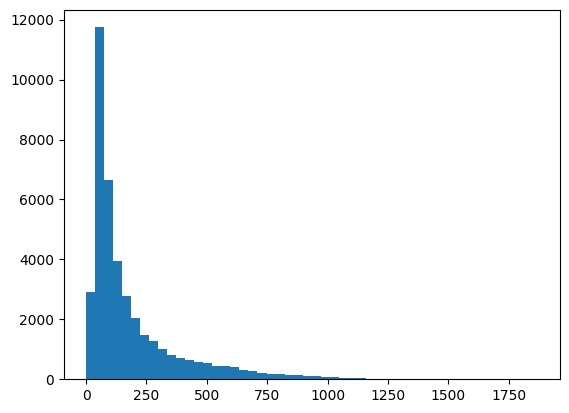

In [ ]:
plt.hist(df['length'],bins=50)
plt.show()

In [ ]:
df.groupby('label').describe()

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
CG     20216.0  4.259893  1.141065  1.0  4.0  5.0  5.0  5.0  20216.0   
OR     20216.0  4.253265  1.147652  1.0  4.0  5.0  5.0  5.0  20216.0   

                                                                
             mean         std  min   25%    50%    75%     max  
label                                                           
CG     154.059953  155.189176  0.0  51.0   88.0  192.0  1191.0  
OR     219.051741  233.256978  8.0  68.0  123.0  272.0  1868.0

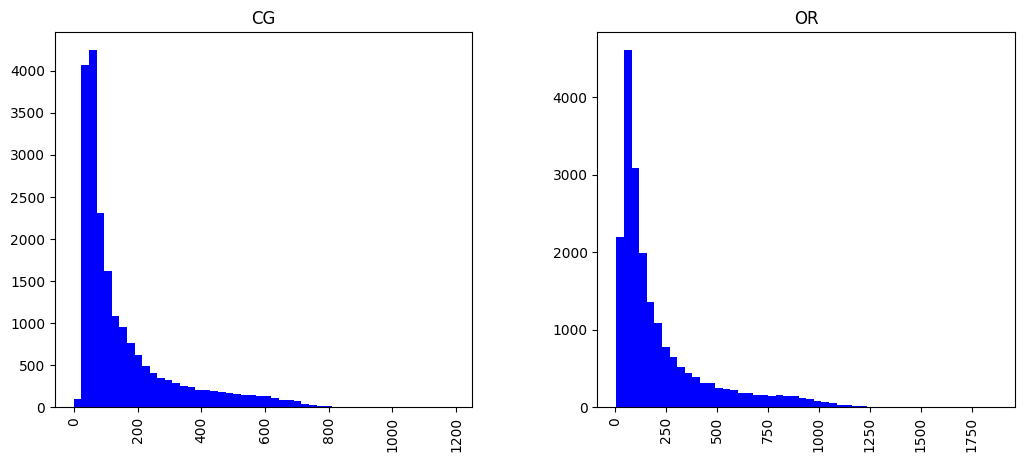

In [ ]:
df.hist(column='length',by='label',bins=50,color='blue',figsize=(12,5))
plt.show()

In [ ]:
# explain :

#The two histograms show the distribution of the lengths of the reviews in the dataset, grouped by the label (fake or genuine).

#The first histogram shows that the lengths of the reviews are roughly normally distributed, with the majority of reviews having a length between 500 and 1500 characters. There are a few outliers with lengths greater than 2000 characters.

#The second histogram shows that the distribution of the lengths of the reviews is different for fake and genuine reviews. Fake reviews tend to be shorter than genuine reviews, with the majority of fake reviews having a length between 250 and 750 characters. Genuine reviews, on the other hand, tend to be longer, with the majority of genuine reviews having a length between 750 and 1500 characters.

#This difference in the distribution of the lengths of the reviews could be used to help identify fake reviews. For example, a machine learning model could be trained to use the length of a review as a feature to predict whether the review is fake or genuine.

In [ ]:
df[df['label']=='OR'][['text_','length']].sort_values(by='length',ascending=False).head().iloc[0].text_


'weak current scienc see twice agre much posit five star review respect read review ill repeat everyth like present found goofi over ear hairdo facial hair arrang daniel vitali describ wild food expert distract ugh ditto david wolf extrem goofi wild hairdo hand jon gabriel describ author weight loss expert nice groom good present stori person transform fellow pound whew becom jock normal weight inspir christian northrup preserv rank one america cutest doctor realli nice look woman present dr mercola jason vale kri carr alejandro junger fine disappoint jami oliv popular uk give babi cow growth fluid pas unscientif popular idea milk none present anyth zilch say work doctor colin campbel milk bodi bad good see present take stand sugar agre evil sugar refin carbohydr respect dr northrup fat make fat sugar statement pas muster commun expert recogn evil sugar mutual exclus recogn proven danger fat particularli fat dead anim extract fat kind oliv oil health food datahookproductlinklink classa

In [ ]:
df.length.describe()

count    40432.000000
mean       186.555847
std        200.751806
min          0.000000
25%         57.000000
50%        105.000000
75%        229.000000
max       1868.000000
Name: length, dtype: float64

In [ ]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x79de4a7fe3b0>)

In [ ]:
bow_transformer.fit(df['text_'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 36372


In [ ]:
review4 = df['text_'][3]
review4

'miss inform use great product price'

In [ ]:
bow_msg4 = bow_transformer.transform([review4])
print(bow_msg4)
print(bow_msg4.shape)

  (0, 13876)	1
  (0, 16445)	1
  (0, 20721)	1
  (0, 25009)	1
  (0, 25156)	1
  (0, 33936)	1
(1, 36372)


In [ ]:
bow_reviews = bow_transformer.transform(df['text_'])

In [ ]:
print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

Shape of Bag of Words Transformer for the entire reviews corpus: (40432, 36372)
Amount of non zero values in the bag of words model: 1007129


In [ ]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.07


In [ ]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(bow_msg4)

  (0, 13876)	1
  (0, 16445)	1
  (0, 20721)	1
  (0, 25009)	1
  (0, 25156)	1
  (0, 33936)	1


In [ ]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

Shape: (40432, 36372)
No. of Dimensions: 2


# **Creating training and testing data**

In [ ]:
review_train, review_test, label_train, label_test = train_test_split(df['text_'],df['label'],test_size=0.35)

In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [ ]:
#Training and testing Multinomial Naive Bayes Algorithm on the preprocessed data
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x79de4a7fe3b0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [ ]:
predictions = pipeline.predict(review_test)
predictions

array(['OR', 'CG', 'CG', ..., 'OR', 'CG', 'CG'], dtype='<U2')

In [ ]:
print('Classification Report:',classification_report(label_test,predictions))
print('Confusion Matrix:',confusion_matrix(label_test,predictions))
print('Accuracy Score:',accuracy_score(label_test,predictions))

Classification Report:               precision    recall  f1-score   support

          CG       0.83      0.89      0.85      7051
          OR       0.88      0.81      0.84      7101

    accuracy                           0.85     14152
   macro avg       0.85      0.85      0.85     14152
weighted avg       0.85      0.85      0.85     14152

Confusion Matrix: [[6247  804]
 [1321 5780]]
Accuracy Score: 0.8498445449406444


In [ ]:
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Model Prediction Accuracy: 84.98%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [ ]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x79de4a7fe3b0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
rfc_pred = pipeline.predict(review_test)
rfc_pred

array(['OR', 'OR', 'CG', ..., 'OR', 'CG', 'CG'], dtype=object)

In [ ]:
print('Classification Report:',classification_report(label_test,rfc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,rfc_pred))
print('Accuracy Score:',accuracy_score(label_test,rfc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.81      0.88      0.85      7051
          OR       0.87      0.79      0.83      7101

    accuracy                           0.84     14152
   macro avg       0.84      0.84      0.84     14152
weighted avg       0.84      0.84      0.84     14152

Confusion Matrix: [[6235  816]
 [1459 5642]]
Accuracy Score: 0.8392453363482193
Model Prediction Accuracy: 83.92%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier())
])

In [ ]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x79de4a7fe3b0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

In [ ]:
dtree_pred = pipeline.predict(review_test)
dtree_pred

array(['CG', 'OR', 'CG', ..., 'OR', 'CG', 'CG'], dtype=object)

In [ ]:
print('Classification Report:',classification_report(label_test,dtree_pred))
print('Confusion Matrix:',confusion_matrix(label_test,dtree_pred))
print('Accuracy Score:',accuracy_score(label_test,dtree_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.73      0.76      0.74      7051
          OR       0.75      0.72      0.73      7101

    accuracy                           0.74     14152
   macro avg       0.74      0.74      0.74     14152
weighted avg       0.74      0.74      0.74     14152

Confusion Matrix: [[5337 1714]
 [2014 5087]]
Accuracy Score: 0.7365743357829282
Model Prediction Accuracy: 73.66%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',KNeighborsClassifier(n_neighbors=2))
])

In [ ]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x79de4a7fe3b0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', KNeighborsClassifier(n_neighbors=2))])

In [ ]:
knn_pred = pipeline.predict(review_test)
knn_pred

array(['OR', 'CG', 'CG', ..., 'CG', 'CG', 'CG'], dtype=object)

In [ ]:
print('Classification Report:',classification_report(label_test,knn_pred))
print('Confusion Matrix:',confusion_matrix(label_test,knn_pred))
print('Accuracy Score:',accuracy_score(label_test,knn_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.55      0.98      0.70      7051
          OR       0.89      0.19      0.32      7101

    accuracy                           0.58     14152
   macro avg       0.72      0.58      0.51     14152
weighted avg       0.72      0.58      0.51     14152

Confusion Matrix: [[6882  169]
 [5739 1362]]
Accuracy Score: 0.5825325042396834
Model Prediction Accuracy: 58.25%


In [ ]:
pipeline_svc = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [ ]:
pipeline_svc.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x79de4a7fe3b0>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [ ]:
svc_pred = pipeline_svc.predict(review_test)
svc_pred

array(['OR', 'OR', 'CG', ..., 'OR', 'CG', 'CG'], dtype=object)

In [ ]:
print('Classification Report:',classification_report(label_test,svc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,svc_pred))
print('Accuracy Score:',accuracy_score(label_test,svc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.90      0.87      0.88      7051
          OR       0.87      0.90      0.89      7101

    accuracy                           0.88     14152
   macro avg       0.89      0.88      0.88     14152
weighted avg       0.89      0.88      0.88     14152

Confusion Matrix: [[6126  925]
 [ 706 6395]]
Accuracy Score: 0.8847512719050311
Model Prediction Accuracy: 88.48%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])

In [ ]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x79de4a7fe3b0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [ ]:
lr_pred = pipeline.predict(review_test)
lr_pred

array(['OR', 'OR', 'CG', ..., 'OR', 'CG', 'CG'], dtype=object)

In [ ]:
print('Classification Report:',classification_report(label_test,lr_pred))
print('Confusion Matrix:',confusion_matrix(label_test,lr_pred))
print('Accuracy Score:',accuracy_score(label_test,lr_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.88      0.85      0.86      7051
          OR       0.86      0.88      0.87      7101

    accuracy                           0.87     14152
   macro avg       0.87      0.87      0.87     14152
weighted avg       0.87      0.87      0.87     14152

Confusion Matrix: [[5994 1057]
 [ 841 6260]]
Accuracy Score: 0.8658846806105144
Model Prediction Accuracy: 86.59%


## **Conclusion**

In [ ]:
print('Performance of various ML models:')
print('\n')
print('Logistic Regression Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')
print('K Nearest Neighbors Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')
print('Decision Tree Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')
print('Random Forests Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')
print('Support Vector Machines Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')
print('Multinomial Naive Bayes Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Performance of various ML models:


Logistic Regression Prediction Accuracy: 86.59%
K Nearest Neighbors Prediction Accuracy: 58.25%
Decision Tree Classifier Prediction Accuracy: 73.66%
Random Forests Classifier Prediction Accuracy: 83.92%
Support Vector Machines Prediction Accuracy: 88.48%
Multinomial Naive Bayes Prediction Accuracy: 84.98%


## **code to create user interface**

In [ ]:
# first create a function which will do preprocessing of data
def text_pipeline(df):
    # Ensure the text column is of type str
    df['text_'] = df['text_'].astype(str)

    # Preprocess the text (remove stopwords, punctuation, and digits)
    def preprocess(text):
        return ' '.join([word for word in word_tokenize(text)
                         if word not in stopwords.words('english')
                         and not word.isdigit()
                         and word not in string.punctuation])

    df['text_'] = df['text_'].apply(preprocess)

    # Convert the text to lowercase
    df['text_'] = df['text_'].str.lower()

    # Stem the words in the text
    stemmer = PorterStemmer()
    df['text_'] = df['text_'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

    # Lemmatize the words in the text
    lemmatizer = WordNetLemmatizer()
    df['text_'] = df['text_'].apply(lambda text: ' '.join([lemmatizer.lemmatize(word) for word in text.split()]))

    # Calculate the length of each text entry
    df['length'] = df['text_'].apply(len)

    # Define text processing function for CountVectorizer
    def text_process(review):
        nopunc = [char for char in review if char not in string.punctuation]
        nopunc = ''.join(nopunc)
        return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

    # Create a bag-of-words transformer
    bow_transformer = CountVectorizer(analyzer=text_process)
    bow_transformer.fit(df['text_'])
    bow_reviews = bow_transformer.transform(df['text_'])

    # Create a TF-IDF transformer
    tfidf_transformer = TfidfTransformer().fit(bow_reviews)
    tfidf_reviews = tfidf_transformer.transform(bow_reviews)

    return df, bow_reviews, tfidf_reviews

In [ ]:
def get_prediction(sample_review):
    result=''
    data = {'text_': [sample_review]}  # Text as a single value in a column named 'Text'
    used_review_data_frame = pd.DataFrame(data)
    pred = pipeline_svc.predict(text_pipeline(used_review_data_frame)[0].text_)
    if pred=='OR':
        result = 'Original'
    else:
        result = 'Fake'
    return result

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.6/314.6 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.7 MB/s et

In [ ]:
# launch the user interface
import gradio as gr
iface = gr. Interface(fn=get_prediction, inputs=gr.Textbox(), outputs="text", title="Fake Review Detector",
                      description ="Prediction done with Support Vector Machines, Prediction Accuracy: 88.38%")
iface. launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://7300869bd5d5066b33.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
